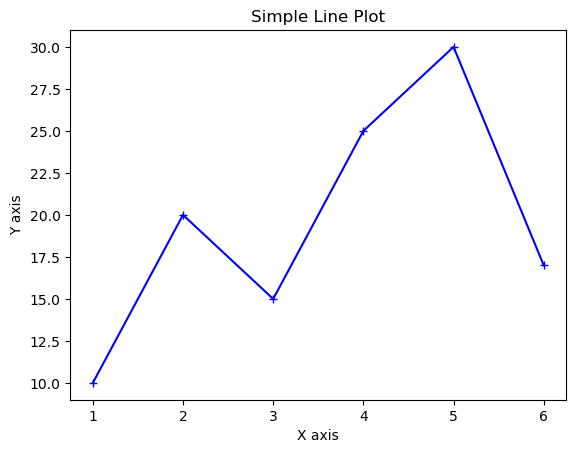

In [61]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6]
y=[10,20,15,25,30,17]

#Create plot

plt.plot(x,y,color='blue', marker='+')
plt.title("Simple Line Plot")
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.savefig('line_plot.png', dpi=100, bbox_inches='tight')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


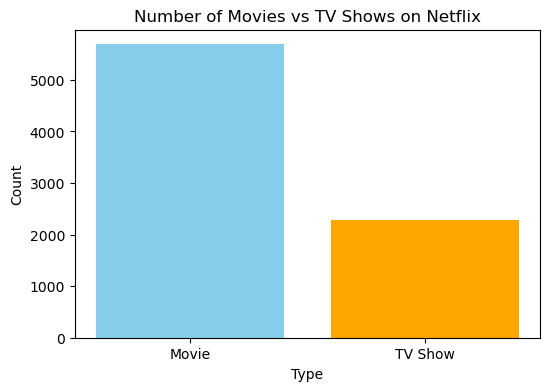

In [58]:

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("netflix_titles.csv")

df.info()

# clean data
df= df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))

#ML

#Create plot
plt.bar(type_counts.index,type_counts.values,color=['skyblue', 'orange'])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')

plt.savefig('Movie_vs_tvshows.png', dpi=100, bbox_inches='tight')
plt.show()



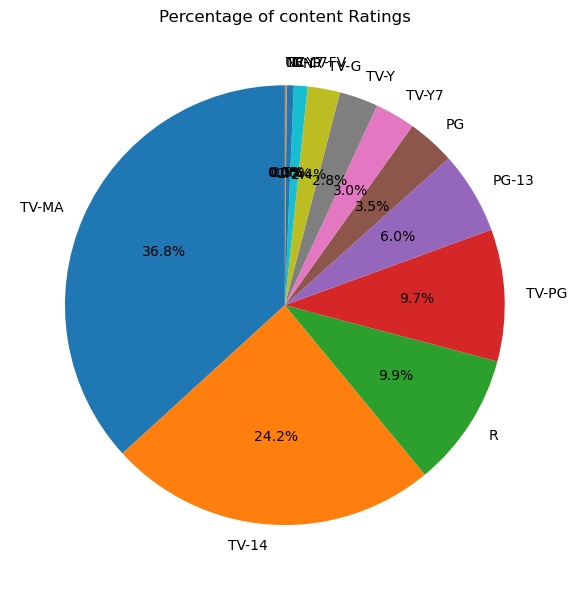

In [20]:
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of content Ratings")
plt.tight_layout()
plt.savefig('contantet_rating.png')
plt.show()                                      

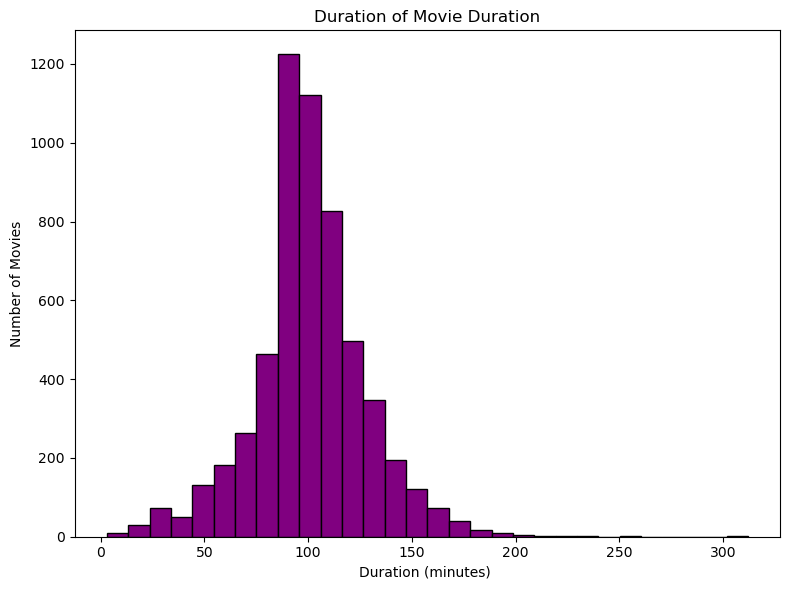

In [26]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30, color='purple', edgecolor='black')
plt.title("Duration of Movie Duration")
plt.xlabel('Duration (minutes) ')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Histogram.png')
plt.show()                             


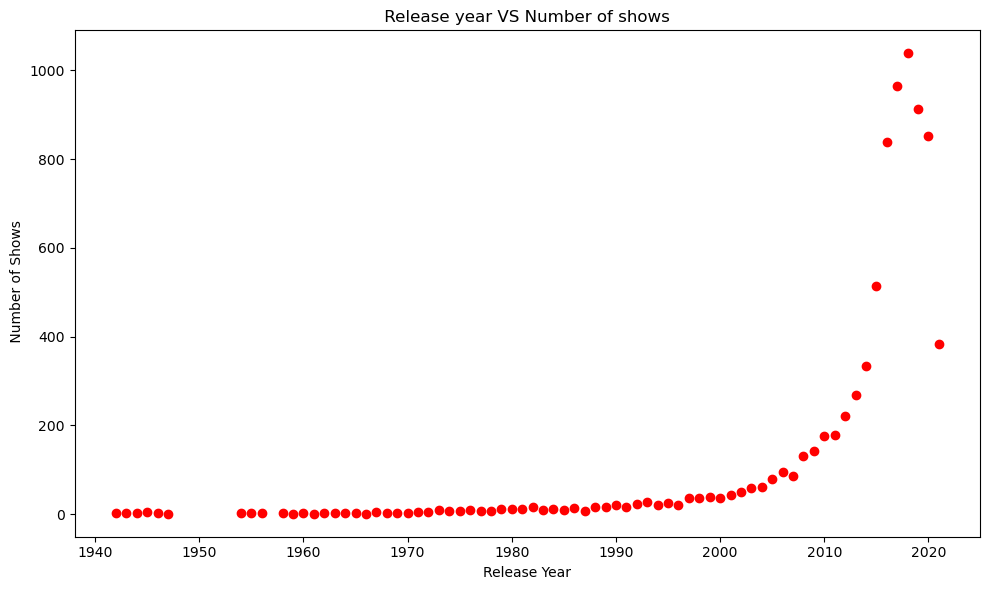

In [27]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values, color='red' )
plt.title(" Release year VS Number of shows ")
plt.xlabel('Release Year')
plt.ylabel(' Number of Shows')
plt.tight_layout()
plt.savefig('release_year-scatter.png')
plt.show()                             

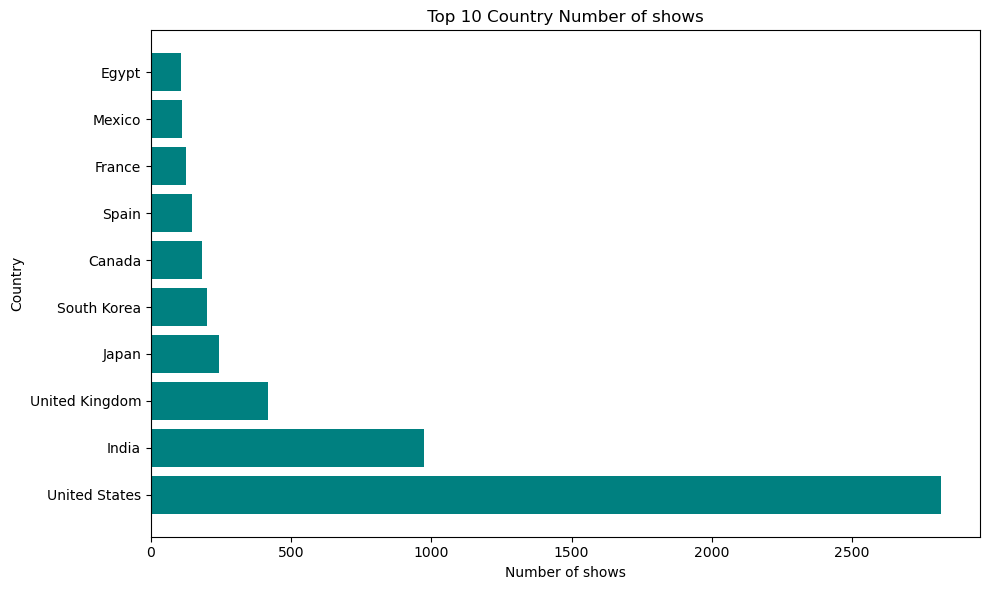

In [49]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index, country_counts.values, color='teal' )
plt.title(" Top 10 Country Number of shows ")
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Country.png')
plt.show()                             



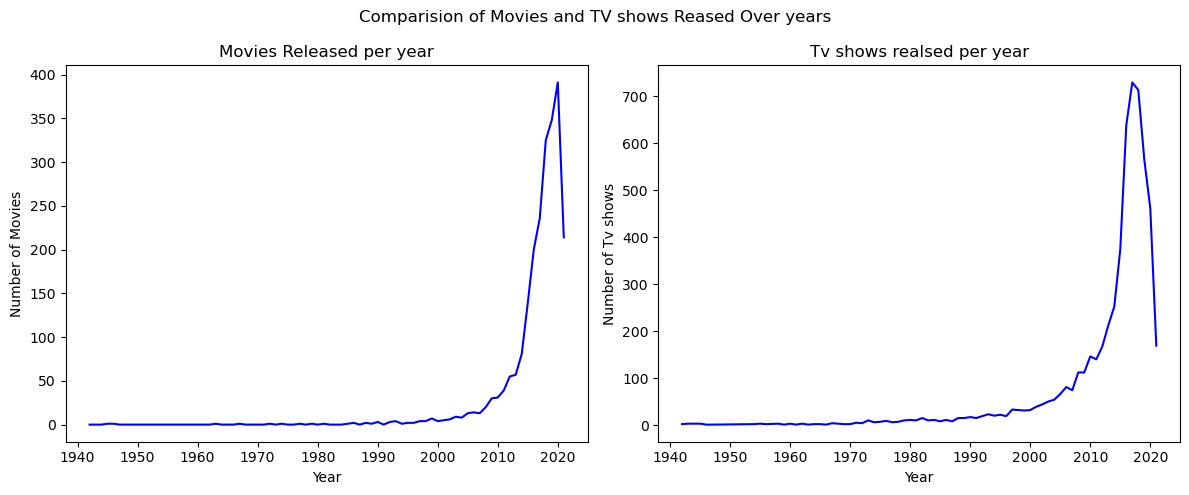

In [50]:
countent_By_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))


#First subplot:movies

ax[0].plot(countent_By_year.index,countent_By_year['TV Show'], color='blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')


#First subplot:TV Showss

ax[1].plot(countent_By_year.index,countent_By_year['Movie'], color='blue')
ax[1].set_title('Tv shows realsed per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Tv shows')

fig.suptitle('Comparision of Movies and TV shows Reased Over years')
plt.tight_layout()
plt.savefig('Movies_tv_shows_com.png')

